In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt 
import time
import os 
import copy
from torch.utils.data import DataLoader
from dataloader import TinyImageNetLoader, TinyImageNetValLoader
from torchvision.transforms.functional import InterpolationMode
import logging
import sys
import math
from tqdm import tqdm
from model import ViTSimilarModel
from model_v2 import ViTSimilarModel_v2
from siamese import Siamese
from super_contrastive_model import Siamese_v2
from contrastive import ContrastiveLoss
from loss import supervisedContrastiveLoss
# from train_model import TrainModelWrapper
from train_supervised import TrainModelWrapper, CFG
import timm


In [2]:
model = timm.create_model(CFG.model_name, pretrained=True)
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, CFG.embedding_size)

out = model(torch.randn(1, 3, CFG.img_size, CFG.img_size))
print(f'Embedding shape: {out.shape}')

model.to(CFG.device)

Embedding shape: torch.Size([1, 512])


EfficientNet(
  (conv_stem): Conv2dSame(3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNormAct2d(
    48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNormAct2d(
          48, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          24, ep

In [3]:
criterion = supervisedContrastiveLoss()

trainer = TrainModelWrapper(model,criterion,batch_size=32,num_epochs=50)
best_model,history = trainer.trainModel()

Epoch 1/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:53<00:00,  4.50it/s]


train Loss: 0.8940


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.93it/s]


val Loss: 0.7763

Epoch 2/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.56it/s]


train Loss: 0.8932


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.95it/s]


val Loss: 0.7907

Epoch 3/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.8902


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.98it/s]


val Loss: 0.7781

Epoch 4/50
----------


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]C:\Users\msadi\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:24<00:00,  3.83it/s]


train Loss: 0.7141


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.98it/s]


val Loss: 0.5533

Epoch 5/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.56it/s]


train Loss: 0.5907


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.95it/s]


val Loss: 0.5248

Epoch 6/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.56it/s]


train Loss: 0.5922


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.97it/s]


val Loss: 0.5849

Epoch 7/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.56it/s]


train Loss: 0.5889


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.95it/s]


val Loss: 0.5643

Epoch 8/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:24<00:00,  3.82it/s]


train Loss: 0.5004


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.96it/s]


val Loss: 0.4427

Epoch 9/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:49<00:00,  4.60it/s]


train Loss: 0.4723


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  5.00it/s]


val Loss: 0.4391

Epoch 10/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.4829


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.88it/s]


val Loss: 0.4511

Epoch 11/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.4672


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.98it/s]


val Loss: 0.4505

Epoch 12/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.80it/s]


train Loss: 0.4211


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.76it/s]


val Loss: 0.4218

Epoch 13/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:54<00:00,  4.49it/s]


train Loss: 0.4139


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.92it/s]


val Loss: 0.3731

Epoch 14/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:54<00:00,  4.47it/s]


train Loss: 0.4093


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.79it/s]


val Loss: 0.3923

Epoch 15/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:56<00:00,  4.42it/s]


train Loss: 0.4136


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.85it/s]


val Loss: 0.3826

Epoch 16/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:31<00:00,  3.69it/s]


train Loss: 0.3695


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.90it/s]


val Loss: 0.3340

Epoch 17/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:00<00:00,  4.33it/s]


train Loss: 0.3727


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:17<00:00,  4.57it/s]


val Loss: 0.3140

Epoch 18/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:56<00:00,  4.44it/s]


train Loss: 0.3609


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.83it/s]


val Loss: 0.3585

Epoch 19/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.3617


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.90it/s]


val Loss: 0.3580

Epoch 20/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:26<00:00,  3.79it/s]


train Loss: 0.3164


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.92it/s]


val Loss: 0.2994

Epoch 21/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.3216


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.99it/s]


val Loss: 0.2916

Epoch 22/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.3199


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.91it/s]


val Loss: 0.2985

Epoch 23/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:53<00:00,  4.52it/s]


train Loss: 0.3186


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.87it/s]


val Loss: 0.2934

Epoch 24/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.80it/s]


train Loss: 0.2910


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.94it/s]


val Loss: 0.2865

Epoch 25/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.2817


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.94it/s]


val Loss: 0.2854

Epoch 26/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.2821


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.93it/s]


val Loss: 0.2724

Epoch 27/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.2711


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.81it/s]


val Loss: 0.2664

Epoch 28/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.81it/s]


train Loss: 0.2815


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.87it/s]


val Loss: 0.2621

Epoch 29/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.2663


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.86it/s]


val Loss: 0.2415

Epoch 30/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.2635


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.80it/s]


val Loss: 0.2592

Epoch 31/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.2685


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.92it/s]


val Loss: 0.2633

Epoch 32/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.81it/s]


train Loss: 0.2378


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.94it/s]


val Loss: 0.2407

Epoch 33/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.2309


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.85it/s]


val Loss: 0.2208

Epoch 34/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.2275


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.90it/s]


val Loss: 0.2363

Epoch 35/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.2238


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.93it/s]


val Loss: 0.2367

Epoch 36/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.80it/s]


train Loss: 0.1980


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.86it/s]


val Loss: 0.1941

Epoch 37/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.1933


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.94it/s]


val Loss: 0.2058

Epoch 38/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:54<00:00,  4.47it/s]


train Loss: 0.1965


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.69it/s]


val Loss: 0.2012

Epoch 39/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:53<00:00,  4.49it/s]


train Loss: 0.1926


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.93it/s]


val Loss: 0.1999

Epoch 40/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.81it/s]


train Loss: 0.1741


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.93it/s]


val Loss: 0.1845

Epoch 41/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.1673


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.93it/s]


val Loss: 0.1858

Epoch 42/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.56it/s]


train Loss: 0.1661


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.95it/s]


val Loss: 0.2025

Epoch 43/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.55it/s]


train Loss: 0.1718


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.90it/s]


val Loss: 0.1793

Epoch 44/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.80it/s]


train Loss: 0.1538


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.92it/s]


val Loss: 0.1761

Epoch 45/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:52<00:00,  4.54it/s]


train Loss: 0.1505


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:15<00:00,  4.94it/s]


val Loss: 0.1774

Epoch 46/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.1549


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.93it/s]


val Loss: 0.1816

Epoch 47/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.1442


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.92it/s]


val Loss: 0.1812

Epoch 48/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [03:25<00:00,  3.80it/s]


train Loss: 0.1424


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.85it/s]


val Loss: 0.1924

Epoch 49/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:51<00:00,  4.55it/s]


train Loss: 0.1345


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.92it/s]


val Loss: 0.1745

Epoch 50/50
----------


100%|████████████████████████████████████████████████████████████████████████████████| 782/782 [02:53<00:00,  4.52it/s]


train Loss: 0.1343


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:16<00:00,  4.92it/s]

val Loss: 0.1937

Training complete in 2h 44m 3s
Best Loss  inf


In [4]:
torch.save(best_model.state_dict(), 'model_weights.pth')


In [33]:
print(history['val loss'])

[0.7763259101510048, 0.790743185043335, 0.7780701259613038, 0.5533106590270996, 0.5247909028053284, 0.5849368274688721, 0.5642634580612182, 0.44265855915546415, 0.439077764415741, 0.45113640396595, 0.4505008292198181, 0.42179575586915014, 0.3731317107268609, 0.39226350812911986, 0.382554548561573, 0.33396728920936586, 0.3139898581266403, 0.3584548239707947, 0.35801166934967044, 0.299406481218338, 0.2916088606595993, 0.29851552591323854, 0.2933831782341003, 0.2864690920030698, 0.28538257365226744, 0.2723777566194534, 0.26641829538345335, 0.2620857273817062, 0.24150366356372832, 0.2592013666272163, 0.26334343509674074, 0.2407331328392029, 0.22079616103172303, 0.23633589156866075, 0.23665533582568168, 0.1940648552954197, 0.20584876775741578, 0.20117226856052875, 0.19987232262194157, 0.184509807112813, 0.18576081255674362, 0.20249318043589593, 0.1793105712890625, 0.17611180874109267, 0.17735366547703743, 0.18158443296849727, 0.18117442393898964, 0.1923962318232574, 0.17451548912227155, 0.1

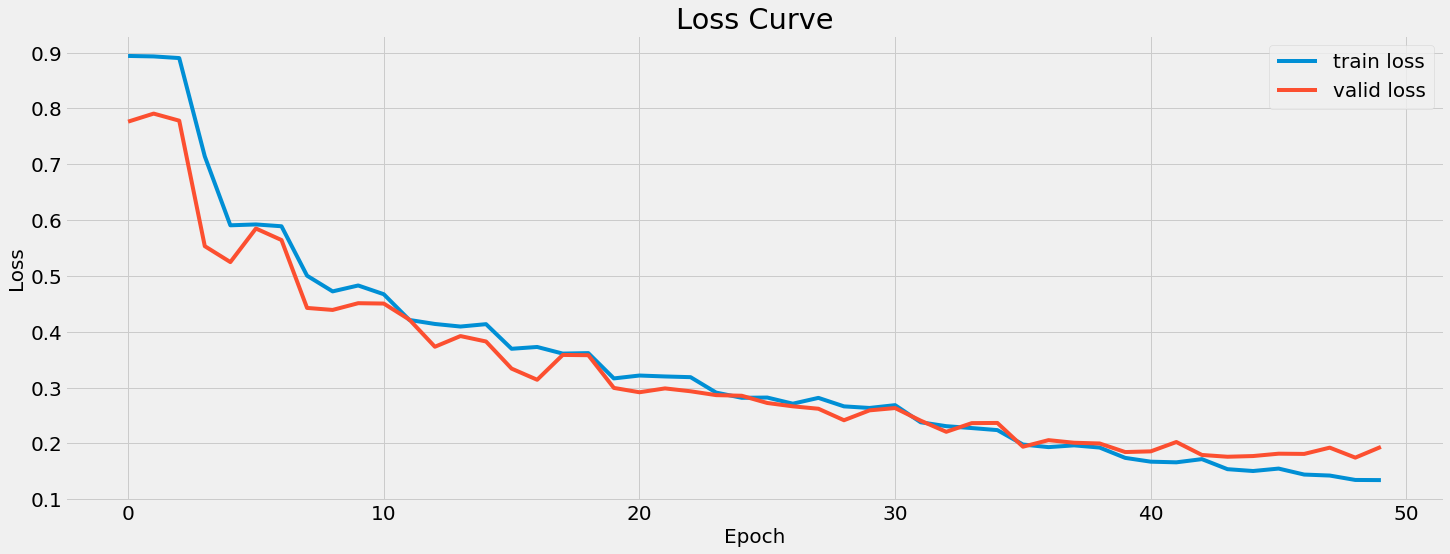

In [7]:
plt.style.use('fivethirtyeight')
plt.rcParams["font.size"] = "20"
fig = plt.figure(figsize=(22,8))
epochs = list(range(50))
plt.plot(epochs, history['train loss'], label='train loss')
plt.plot(epochs, history['val loss'], label='valid loss')
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend()
plt.title('Loss Curve');

In [3]:
from train_final import FinalTrainWrapper
from model_supervised import SimilarityModel
from dataloader_supervised import SimilarityDataset, SimilarityValDataset
import cv2

x = SimilarityModel()

In [24]:
compose = transforms.Compose([transforms.ToTensor(),transforms.Resize((224,224),interpolation=InterpolationMode.BICUBIC)])
dataset = SimilarityValDataset(compose)
dataloader = DataLoader(dataset,batch_size=32, shuffle=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
t=0
x.eval()
res=np.array([])
org=np.array([])
with tqdm(total=len(dataloader)) as pbar:
    for img1,img2,labels in dataloader:
        img1 = img1.to(device)
        img2 = img2.to(device)
        labels = labels.to(device)
        output = x(img1,img2)
        output = output>0.21
        t += (output==labels).sum()
        
        output = output.to('cpu').detach().numpy()
        labels = labels.to('cpu').detach().numpy()
        
        res = np.concatenate((res,output),axis=None)
        org = np.concatenate((org,labels),axis=None)
        
        pbar.update(1)
        # p=input()
print(f"Validation Accuracy: {t.item()/len(dataset)}")

100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [00:18<00:00,  3.35it/s]

Validation Accuracy: 0.8715


In [25]:
print(res.shape,org.shape)

(2000,) (2000,)


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(org,res)

array([[890, 110],
       [147, 853]], dtype=int64)

Number of correct predictions:  tensor(25, device='cuda:0')


Correct Predictions are given as follows: 


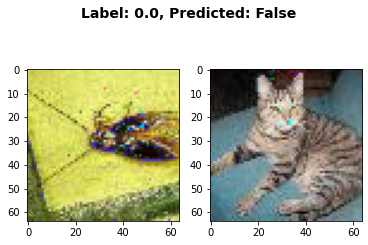

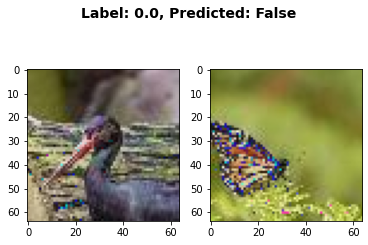

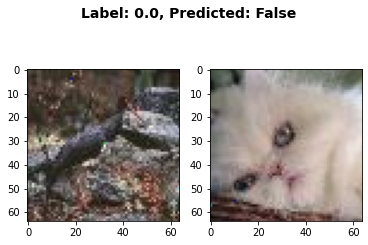

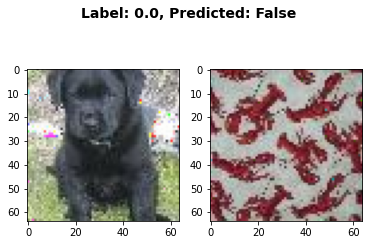

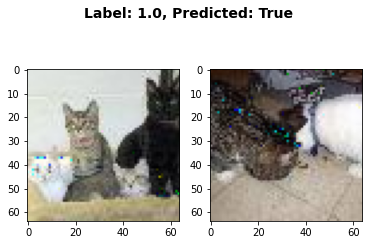

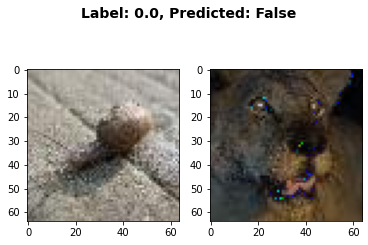

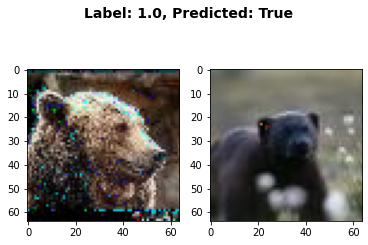

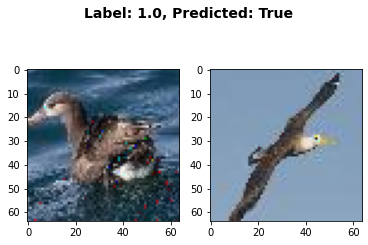

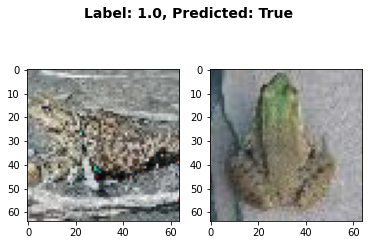

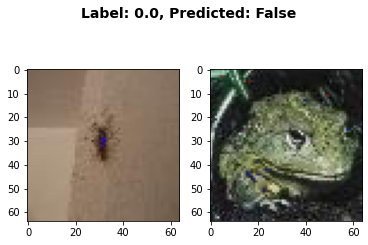

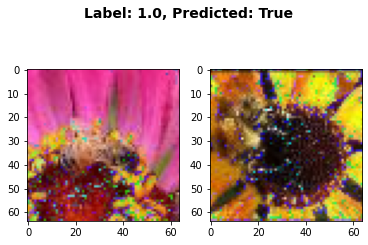

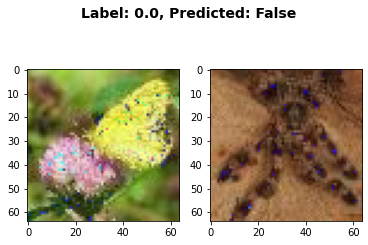

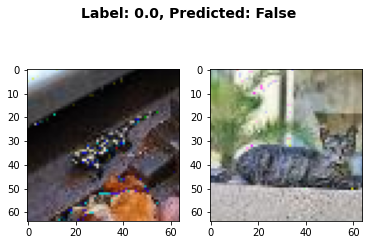

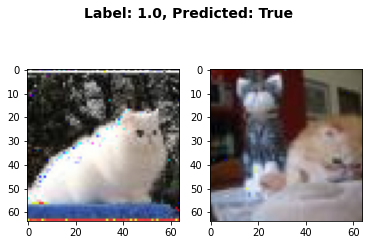

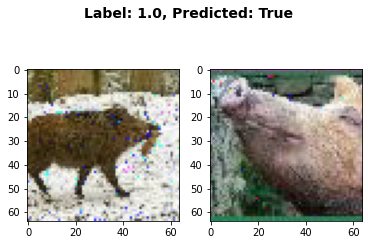

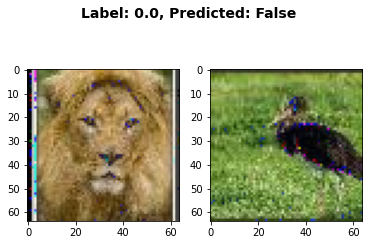

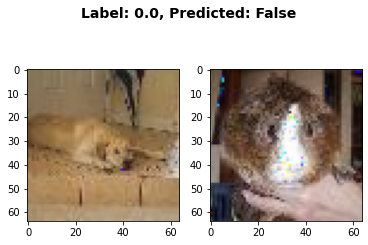

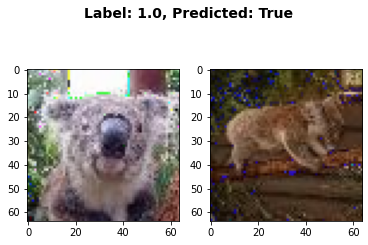

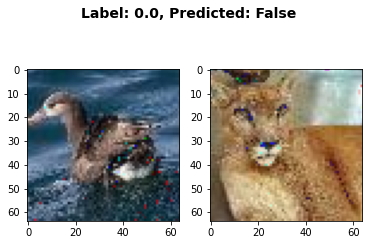

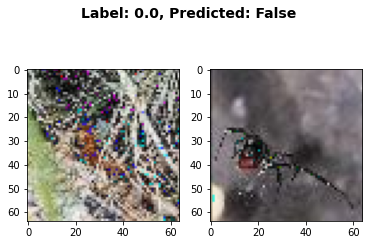

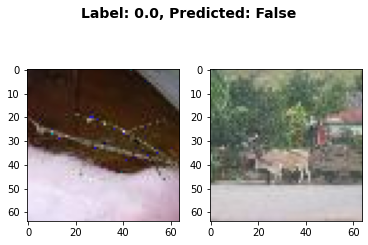

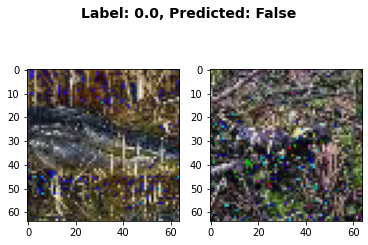

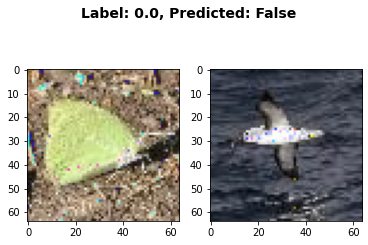

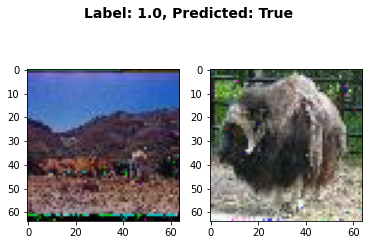

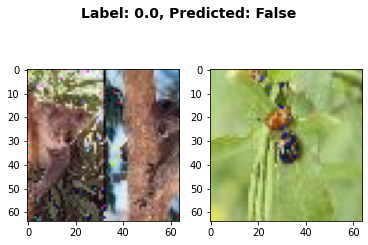

In [6]:

data_iter = iter(dataloader)

input1 ,input2, labels = next(data_iter)
input1 = input1.to(device)
input2 = input2.to(device)
labels = labels.to(device)
output = x(input1,input2)
output = output>0.21
t = (output==labels).sum()


print("Number of correct predictions: ",t)

print("")
print("")
print("Correct Predictions are given as follows: ")
for i in range(input1.size()[0]):
    img1 = input1[i]

    img1 = transforms.ToPILImage()(img1)
    img1 = np.asarray(img1)
    img1 = cv2.resize(img1,(64,64))
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

    img2 = input2[i]

    img2 = transforms.ToPILImage()(img2)
    img2 = np.asarray(img2)
    img2 = cv2.resize(img2,(64,64))
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

    # img = np.moveaxis()
    # print(img1.shape)
    if labels[i]==output[i]:

        f, axarr = plt.subplots(1,2)
        f.suptitle(f'Label: {str(labels[i].item())}, Predicted: {str(output[i].item())}', fontsize=14, fontweight='bold')

        axarr[0].imshow(img1)
        axarr[1].imshow(img2)
        plt.show()
        # l=input()

Wrong Predictions are as Follows:


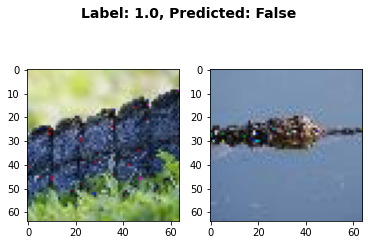

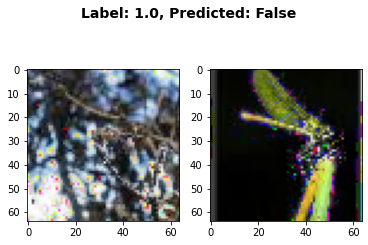

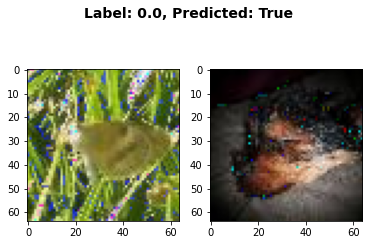

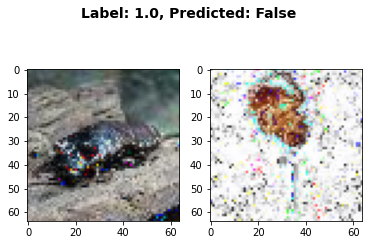

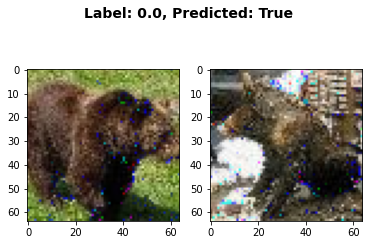

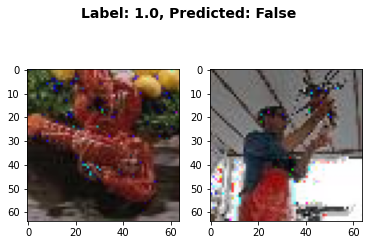

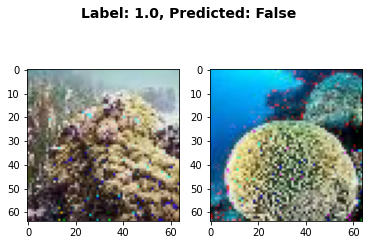

In [7]:

print("Wrong Predictions are as Follows:")
for i in range(input1.size()[0]):
    img1 = input1[i]

    img1 = transforms.ToPILImage()(img1)
    img1 = np.asarray(img1)
    img1 = cv2.resize(img1,(64,64))
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

    img2 = input2[i]

    img2 = transforms.ToPILImage()(img2)
    img2 = np.asarray(img2)
    img2 = cv2.resize(img2,(64,64))
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

    # img = np.moveaxis()
    # print(img1.shape)
    if labels[i]!=output[i]:

        f, axarr = plt.subplots(1,2)
        f.suptitle(f'Label: {str(labels[i].item())}, Predicted: {str(output[i].item())}', fontsize=14, fontweight='bold')

        axarr[0].imshow(img1)
        axarr[1].imshow(img2)
        plt.show()
        # l=input()